In [1]:
# this imports the python module numpy, which is necessary to load the data. We'll get to that later! 
import numpy as np

# Uncomment the following two lines if you want to look at Kiel temperatures
infile = "../../data/T-Holtenau/data/data_OBS_DEU_P1D_T2M_2564.csv"
temperature=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=3).tolist()

# Uncomment the following two lines if you want to look at Antarctica temperatures
#infile = "uedata/IDCJAC0010_300017_1800_Data.csv"
#temperature=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=5).tolist()



# Task 1 Calculate the gradient
grad_t = []
i=1
while i < len(temperature):
    grad_t.append(temperature[i]-temperature[i-1])
    i+=1

# Alternative with for loop
#for i in range(len(temperature)-1):
#    diff = abs(temperature[i] - temperature[i+1]) 
#    grad_t.append(diff)



# Task 2 Sort in years

# For Kiel dataset: Consider that time series starts in June 1986
# --------------------
days_1986 = 30+31+31+30+31+30+31  # days form 01.06.1986 to 31.12.1986

# set up counter of days and years
# --------------------------------
days_so_far = days_1986 
year = 1986

# create list of all years and empty lists for max/avg/min temp as well as max/avg grad
# -------------------------------------------------------------------------------
all_years = range(1986, 2022+1, 1)
max_temps = []
avg_temps = []
min_temps = []
max_grad = []
avg_grad = []


# seperate data of year 1986 (only half the year)
# -----------------------------------------------
temperature_1986 = temperature[:days_1986]
gradient_1986 = grad_t[:days_1986-1]


# get values for 1986
# -------------------
max_temps.append(max(temperature_1986))
avg_temps.append(np.mean(temperature_1986))
min_temps.append(min(temperature_1986))
max_grad.append(max(gradient_1986))
avg_grad.append(np.mean(gradient_1986))


n_years = 2022-1986
for i in range(n_years):
    # increase year counter
    # ---------------------
    year += 1
    
    # check if 366 days
    # -----------------
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):  # if 366 days
        # slice temp and grad array to current year and safe as txt
        # ---------------------------------------------------------
        temp = temperature[days_so_far:days_so_far+366]
        grad = grad_t[days_so_far:days_so_far+366]
        
        # save max/min/avg values for current year
        # ----------------------------------------
        max_temps.append(max(temp))
        avg_temps.append(np.mean(temp))
        min_temps.append(min(temp))
        max_grad.append(max(grad))
        avg_grad.append(np.mean(grad))
        
        # increase days counter
        # ---------------------
        days_so_far += 366
        
    # if not 366 days
    # ---------------
    else:
        # slice temp and grad array to current year and safe as txt
        # ---------------------------------------------------------
        temp = temperature[days_so_far:days_so_far+365]
        grad = grad_t[days_so_far:days_so_far+365]
        
        # save max/min/avg values for current year
        # ----------------------------------------
        max_temps.append(max(temp))
        avg_temps.append(np.mean(temp))
        min_temps.append(min(temp))
        max_grad.append(max(grad))
        avg_grad.append(np.mean(grad))
        
        # increase days counter
        # ---------------------
        days_so_far += 365

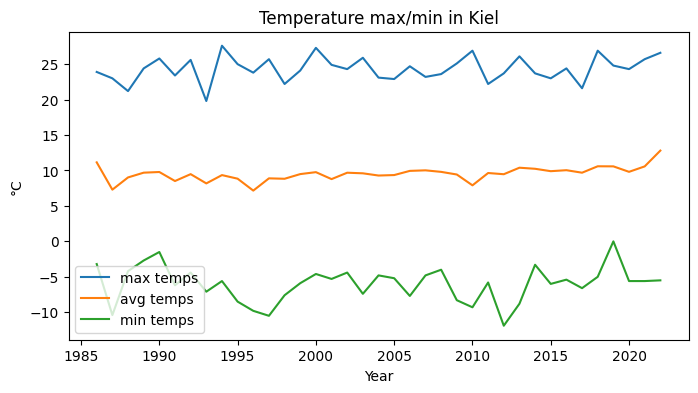

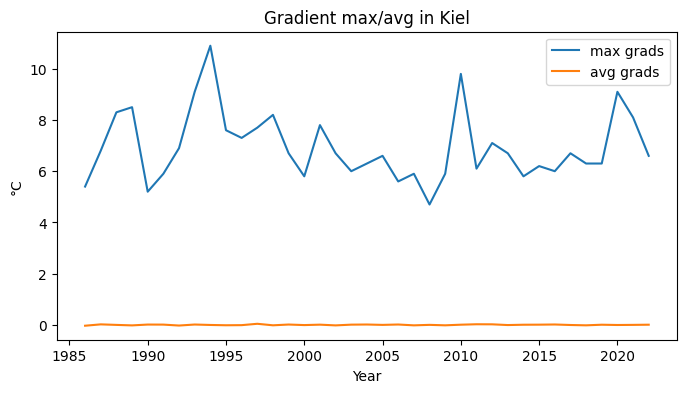

In [3]:
import matplotlib.pyplot as plt

# define figure for temp
# ----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_temps, label='max temps')
plt.plot(all_years, avg_temps, label='avg temps')
plt.plot(all_years, min_temps, label='min temps')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Temperature max/min in Kiel')

# command to only show the plot, nothing else
plt.show()

# define figure for grad
# -----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_grad, label='max grads')
plt.plot(all_years, avg_grad, label='avg grads')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Gradient max/avg in Kiel')

# command to only show the plot, nothing else
plt.show()